# 輸入向量機(Import Vector Machine)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import random
import math
import matplotlib.pyplot as plt

##### 設定我們有60個點，其中30個是圈圈，30個是叉叉

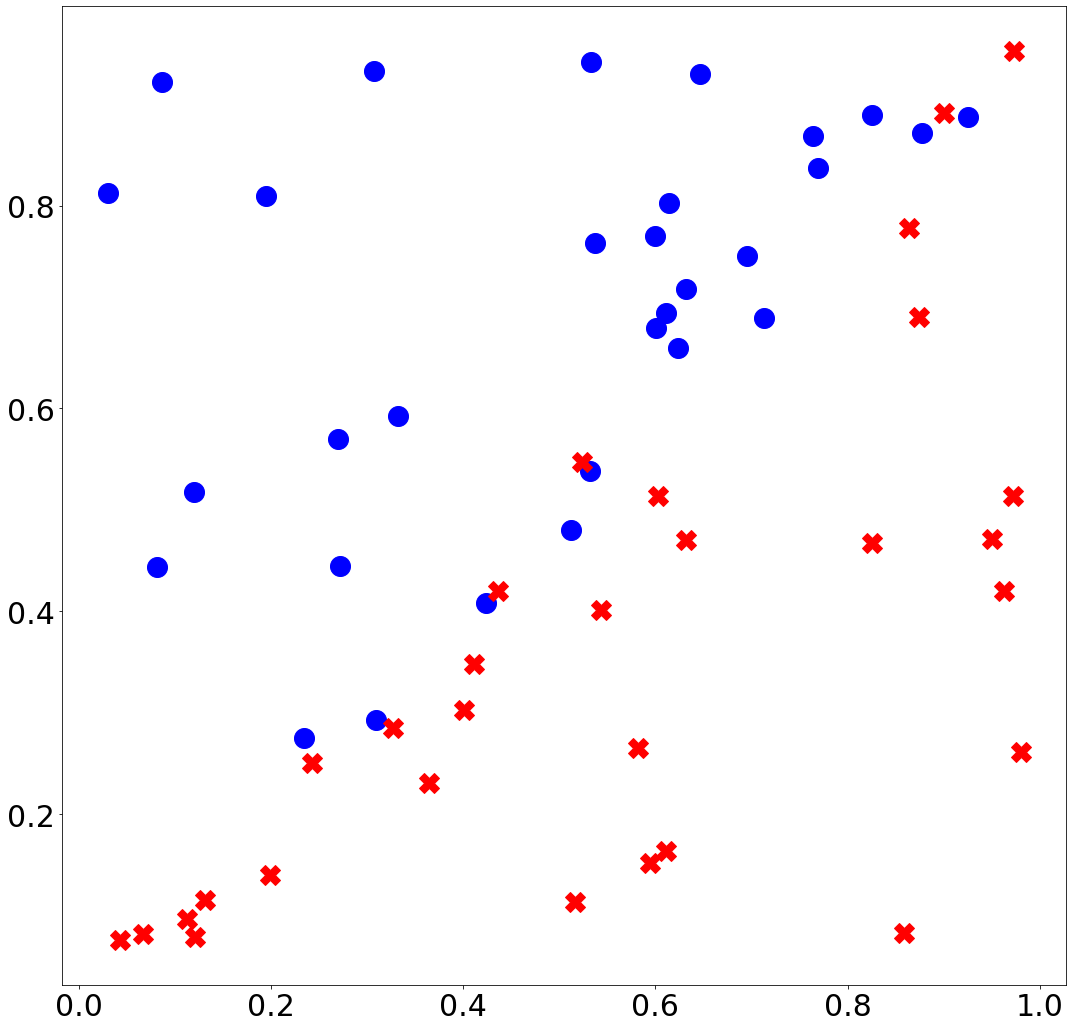

In [2]:
# 這裡我們建立一個60*2的矩陣x
# 60代表我們有60個點，2代表為2維空間(平面)
x=np.zeros((60,2))
# 這裡我們建立一個長度60的向量y
# 用來儲存我們的標記資料是圈圈(+1)還是叉叉(-1)
y=np.zeros(60)
# 因為有60筆資料，所以跑60個迴圈
for i in range(0,60): 
    # 標記y前半段0~29為圈圈(+1)，後半段30~59為叉叉(-1)
    # 也就是圈圈30個點，叉叉30個點
    f=-0.05
    if(i<30):
        y[i]=1
        x[i,0]=random.random()
        x[i,1]=random.uniform(x[i,0],1)+f
    else:
        y[i]=0
        x[i,0]=random.random()
        x[i,1]=random.uniform(0,x[i,0])-f
    # 這裡我們隨機給定我們資料的位置
    # 而f可以決定我們圈圈和叉叉兩組數據分的越開或是越近
    
# 設定我們輸出圖片的大小
plt.rcParams["figure.figsize"] = (18,18)
#畫出圈圈的點，bo：b代表藍色、o代表圈圈、marksize為大小
plt.plot(x[:30,0],x[:30,1],"bo",markersize=20)
#畫出叉叉的點，rX：r代表紅色、X代表叉叉、marksize為大小
plt.plot(x[30:,0],x[30:,1],"rX",markersize=20)
# 設定x和y軸座標的字體大小
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#畫出來
plt.show()

# Sigmoid Function`

In [3]:
def sigmoid(s):
    return(1/(1+np.exp(-s)))

# Polynomial Kernel

In [4]:
def Polynomial_kernel(x,xx,power,gamma,zeta):
    # 最後出來要為N*N的矩陣
    # 這裡可以對照文章公式
    return (zeta+gamma*np.dot(x,xx.T))**power

# Gradient Descend VS Newton Method

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


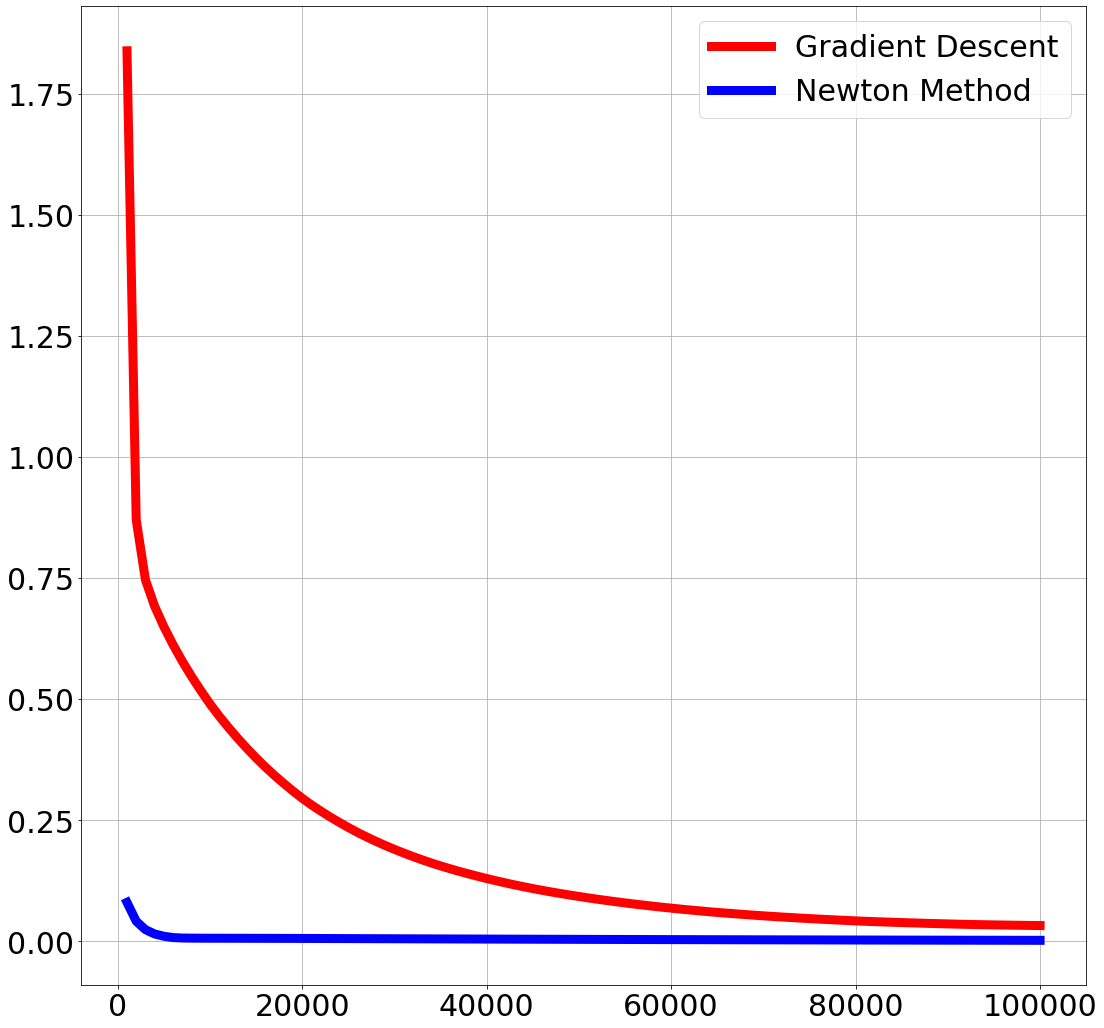

In [5]:
N=60
# c為次方數
c=5
gamma=1
zeta=1
lambda_2=1
# r: 梯度下降learning Rate
r=0.00015
# s: 牛頓法learning Rate
s=0.01
K=Polynomial_kernel(x,x,c,gamma,zeta)
########### 梯度下降 ###########
a=np.zeros(N)
# GD為第1000*i次迭代後的更新大小
GD=np.zeros(100)
k=0
# 執行梯度下降
for i in range(0,100000):
    # 執行梯度下降演算法，可以對照文章中公式
    A=(2*lambda_2/N)*np.dot(K,a)
    B=np.dot(K/np.outer(np.ones(N)+np.exp(-np.dot(K,a)),np.ones(N)).T,np.ones(N)-y)/N
    C=np.dot(K/np.outer(np.ones(N)+np.exp(np.dot(K,a)),np.ones(N)).T,-y)/N
    a=a-r*(A+B+C)
    # 存取更新值
    if((i+1)%1000==0):
        GD[k]=sum(abs(A+B+C))
        k+=1
########### 牛頓法 ###########
a=np.zeros(N)
# NM為第1000*i次迭代後的更新大小
NM=np.zeros(100)
k=0
# 執行牛頓法
for i in range(0,100000):
    # 執行牛頓法，可以對照文章中公式
    # 一次微分項
    A=(2*lambda_2/N)*np.dot(K,a)
    B=np.dot(K/np.outer(np.ones(N)+np.exp(-np.dot(K,a)),np.ones(N)).T,np.ones(N)-y)/N
    C=np.dot(K/np.outer(np.ones(N)+np.exp(np.dot(K,a)),np.ones(N)).T,-y)/N
    # 二次微分項
    D=(2*lambda_2/N)*np.diagonal(K)
    E=np.dot((K**2)/np.outer(2*np.ones(N)+np.exp(np.dot(K,a))+np.exp(-np.dot(K,a)),np.ones(N)).T,np.ones(N))/N
    # 更新權重
    a=a-s*(A+B+C)/(D+E)
    # 存取更新值
    if((i+1)%1000==0):
        NM[k]=sum(abs((A+B+C)/(D+E)))
        k+=1
# 視覺化
plt.rcParams["figure.figsize"] = (18,18)
iters=np.linspace(1000,100000,100000/1000)
plt.plot(iters,GD,"r-",linewidth=9,label="Gradient Descent")
plt.plot(iters,NM,"b-",linewidth=9,label="Newton Method")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=30)
plt.grid()
plt.show()

# IVM Algorithm

In [16]:
# s: learning rate / STEP: 子迴圈迭代數目
s=0.05
STEP=200
a=np.zeros(N)
# H:為cost function
# a:為alpha值

########## 第一次回圈 ############
# 存入每筆資料當import vector計算出的H和a值
H_candidate=np.ones(N)
a_candidate=np.zeros(N)
# 第一輪因為沒有import vector，所以要跑N次
for i in range(0,N):
    a_IV=a[i]
    # 更新權重
    for step in range(0,STEP):
        A=(2*lambda_2/N)*np.dot(K[i,i],a[i])
        B=np.dot(K[i,:]/(np.ones(N)+np.exp(-K[i,:]*a[i])).T,np.ones(N)-y)/N
        C=np.dot(K[i,:]/(np.ones(N)+np.exp(K[i,:]*a[i])).T,-y)/N
        D=(2*lambda_2/N)*K[i,i]
        E=np.dot((K[i,:]**2)/(2*np.ones(N)+np.exp(K[i,:]*a[i])+np.exp(-K[i,:]*a[i])).T,np.ones(N))/N
        a_IV=a_IV-s*(A+B+C)/(D+E)
    # 計算H大小
    H1=(K[i,i]*a_IV**2)*(lambda_2/N)
    H2=np.dot(np.log(sigmoid(K[i,:]*a_IV)),-y)/N
    H3=np.dot(np.log(sigmoid(np.ones(N)-K[i,:]*a_IV)),y-np.ones(N))/N
    # 存入矩陣中
    H_candidate[i]=H1+H2+H3
    a_candidate[i]=a_IV
# 求出H最小的資料，當作import vector
IV=np.argmin(H_candidate)
# 得出我們真正更新後的alpha值
a[IV]=a_candidate[IV]
H=min(H_candidate)
# 輸出第一次迭代結果
print("iter: ",0," / Import vector: ",IV," / H: ",H)
# 接下來就是依序取import vector
for t in range(0,60):
    H_old=H
    # 創建矩陣，存入每次迭代求出的H和a值
    H_candidate=np.ones(N)*10000
    a_candidate=np.zeros((N,2+t))
    # 檢驗每筆資料
    for i in range(0,N):
        # 如果是import vector跳過，不是就執行
        if(i in np.array(IV)):
            continue
        else:
            # 把新的資料，連接到舊有的import vector後面
            if(t>0):
                temp_IV=np.append(IV,np.array(i))
            else:
                temp_IV=np.array([IV,i])
            # 初始化參數
            n=len(temp_IV)
            K_a=np.zeros((n,n))
            K_b=np.zeros((n,N))
            a_IV=np.zeros(n)
            k=0
            for j in temp_IV:
                K_a[k,:]=K[j,temp_IV]
                K_b[k,:]=K[j,:]
                a_IV[k]=a[j]
                k+=1
            # 更新權重
            for step in range(0,STEP):
                A=(2*lambda_2/N)*np.dot(K_a,a_IV)
                B=np.dot(K_b/np.outer(np.ones(N)+np.exp(-np.dot(K_b.T,a_IV)),np.ones(n)).T,np.ones(N)-y)/N
                C=np.dot(K_b/np.outer(np.ones(N)+np.exp(np.dot(K_b.T,a_IV)),np.ones(n)).T,-y)/N
                D=(2*lambda_2/N)*np.diagonal(K_a)
                E=np.dot((K_b)**2/np.outer(2*np.ones(N)+np.exp(np.dot(K_b.T,a_IV))+np.exp(-np.dot(K_b.T,a_IV)),np.ones(n)).T,np.ones(N))/N
                a_IV=a_IV-s*(A+B+C)/(D+E)
            # 計算H大小
            H1=np.dot(np.dot(a_IV,K_a),a_IV)*(lambda_2/N)
            H2=np.dot(np.log(sigmoid(np.dot(K_b.T,a_IV))),-y)/N
            H3=np.dot(np.log(sigmoid(np.ones(N)-np.dot(K_b.T,a_IV))),y-np.ones(N))/N
            H_candidate[i]=H1+H2+H3
            a_candidate[i,:]=a_IV
    # 一樣求出H最小的那筆資料
    index=np.argmin(H_candidate)
    new_a_IV=a_candidate[index,:]
    H=min(H_candidate)
    # 把他加入我們的import vector中
    if(t>0):
        IV=np.append(IV,index)
    else:
        IV=np.array([IV,index])
    k=0
    for j in IV:
        a[j]=new_a_IV[k]
        k+=1
    # 計算錯誤率，並輸出結果
    error=abs((H_old-H))
    print("iter: ",t+1," / Import vector: ",index," / H: ",H," / error: ",error)
    # 如果錯誤率低於10**-5停止運算
    if(error<3*10**-5):
        break

iter:  0  / Import vector:  55  / H:  0.47424276118456726
iter:  1  / Import vector:  3  / H:  0.37748067303041993  / error:  0.09676208815414733
iter:  2  / Import vector:  37  / H:  0.31169231220344146  / error:  0.06578836082697848
iter:  3  / Import vector:  20  / H:  0.3006304009567792  / error:  0.011061911246662282
iter:  4  / Import vector:  10  / H:  0.3000447261594902  / error:  0.0005856747972889931
iter:  5  / Import vector:  23  / H:  0.30034036808897896  / error:  0.0002956419294887769
iter:  6  / Import vector:  16  / H:  0.30033766777554083  / error:  2.70031343813093e-06


# 視覺化

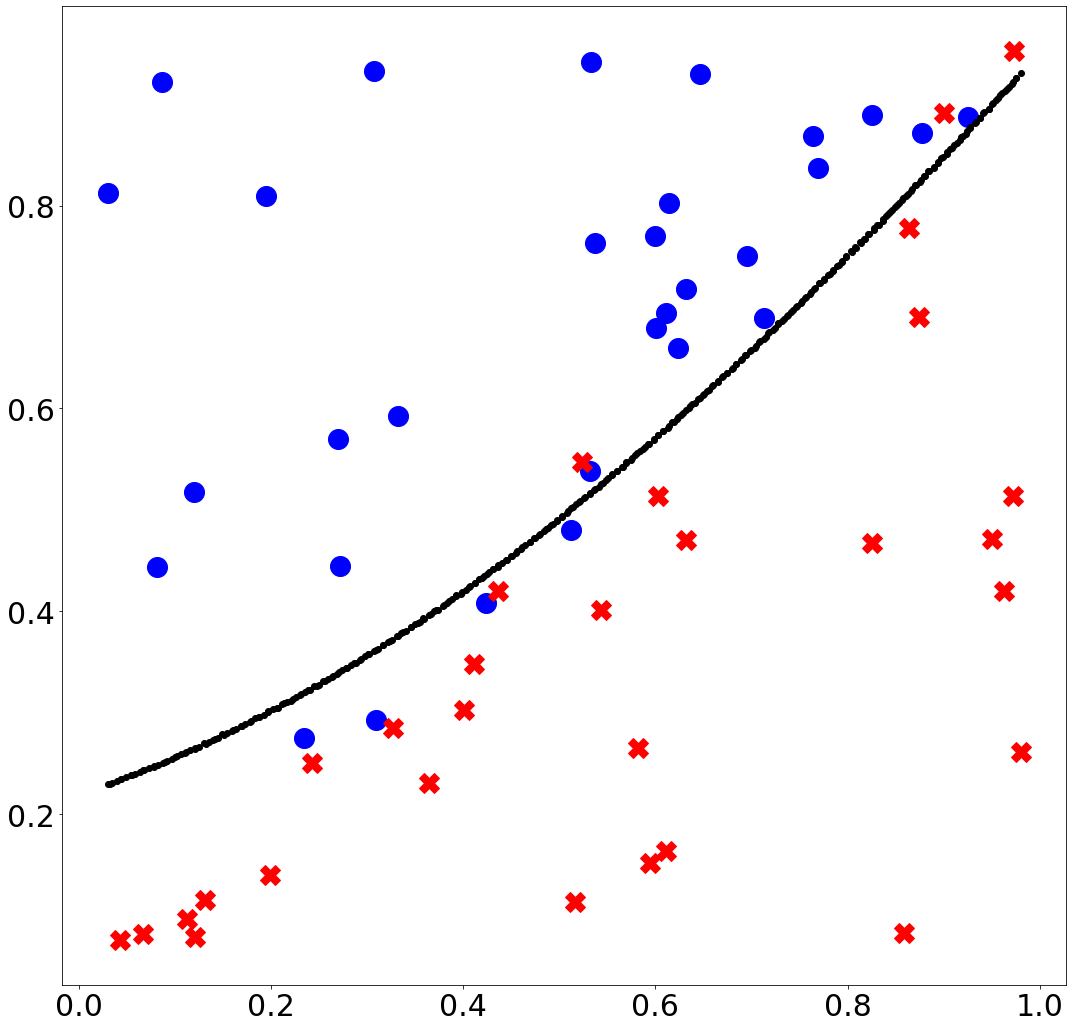

In [17]:
plt.rcParams["figure.figsize"] = (18,18)

# 畫出所有的數據點
plt.plot(x[:30,0],x[:30,1],"bo",markersize=20)
plt.plot(x[30:,0],x[30:,1],"rX",markersize=20)

#標記圖片邊界
x1_low_limit=min(x[:,0])
x1_high_limit=max(x[:,0])
x2_low_limit=min(x[:,1])
x2_high_limit=max(x[:,1])
# 畫出分割線
# 這裡的做法是
# 從x1最小值到x1最大值中間取200個點
# 從x2最小值到x2最大值中間取500個點
# 總共執行10000次，每次計算其套入分割線的方程式，並存入SUM
# 如果SUM從正變負或負變正，代表中間點為分割線

x1=np.linspace(x1_low_limit,x1_high_limit,200)
x2=np.linspace(x2_low_limit,x2_high_limit,500)

for i in x1:
    SUM_TEMP=0
    count=0
    for j in x2:
        SUM=np.dot(a,Polynomial_kernel(x,np.array([i,j]),c,gamma,zeta))
        if(np.sign(SUM)!=np.sign(SUM_TEMP)):
            if(count>0):
                plt.plot(i,(x2[count]+x2[count-1])/2,"ko")
        count+=1
        SUM_TEMP=SUM
x1=np.linspace(x1_low_limit,x1_high_limit,500)
x2=np.linspace(x2_low_limit,x2_high_limit,200)
for j in x2:
    SUM_TEMP=0
    count=0
    for i in x1:
        SUM=np.dot(a,Polynomial_kernel(x,np.array([i,j]),c,gamma,zeta))
        if(np.sign(SUM)!=np.sign(SUM_TEMP)):
            if(count>0):
                plt.plot((x1[count]+x1[count-1])/2,j,"ko")
        count+=1
        SUM_TEMP=SUM    

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#plt.xlim([x1_low_limit,x1_high_limit])
#plt.ylim([x2_low_limit,x2_high_limit])
plt.show()
